In [170]:
import os
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
import csv
%matplotlib inline


In [171]:
# import 10 year Historical Bitcoin Data
bitcoin_df = pd.read_csv("../Data/raw_csv/Bitcoin_Historical_Data.csv" , index_col="Date", parse_dates=True, infer_datetime_format=False)

# Change Price column name to BITCOIN
bitcoin_df_col = bitcoin_df.rename(columns = {"Price" : "BITCOIN"})

# Drop unnecessary columns
bitcoin_df_col.drop(columns=["Open", "High", "Low", "Vol.", "Change %"], inplace=True)


# Slice data for desired date range
clean_data = bitcoin_df_col.sort_index(ascending=True)['2019-10-29' : '2020-10-29']

# Show cleaned and sorted data
# clean_data

clean_data.head()

,BITCOIN
Date,
2019-10-29,"9,411.30"
2019-10-30,"9,157.90"
2019-10-31,"9,152.60"
2019-11-01,"9,230.10"
2019-11-02,"9,300.60"


In [172]:
#Reset index and convert daily Prices to float

clean_data.reset_index()


,Date,BITCOIN
0,2019-10-29,"9,411.30"
1,2019-10-30,"9,157.90"
2,2019-10-31,"9,152.60"
3,2019-11-01,"9,230.10"
4,2019-11-02,"9,300.60"
...,...,...
362,2020-10-25,"13,032.20"
363,2020-10-26,"13,061.60"
364,2020-10-27,"13,657.80"
365,2020-10-28,"13,278.90"


In [173]:
# Convert daily Prices to float

clean_data["BITCOIN"] = clean_data['BITCOIN'].str.replace(",", "").astype("float")
clean_data.head()

,BITCOIN
Date,
2019-10-29,9411.3
2019-10-30,9157.9
2019-10-31,9152.6
2019-11-01,9230.1
2019-11-02,9300.6


In [174]:
#Save cleaned csv file in clean DATA folder
clean_data.to_csv("../Data/clean/Bitcoin.csv")

In [175]:
# Calculate daily returns
daily_returns = clean_data.pct_change()

# Drop N/A
daily_returns_clean = daily_returns.dropna()

daily_returns_clean.head()

,BITCOIN
Date,
2019-10-30,-0.026925
2019-10-31,-0.000579
2019-11-01,0.008468
2019-11-02,0.007638
2019-11-03,-0.010999


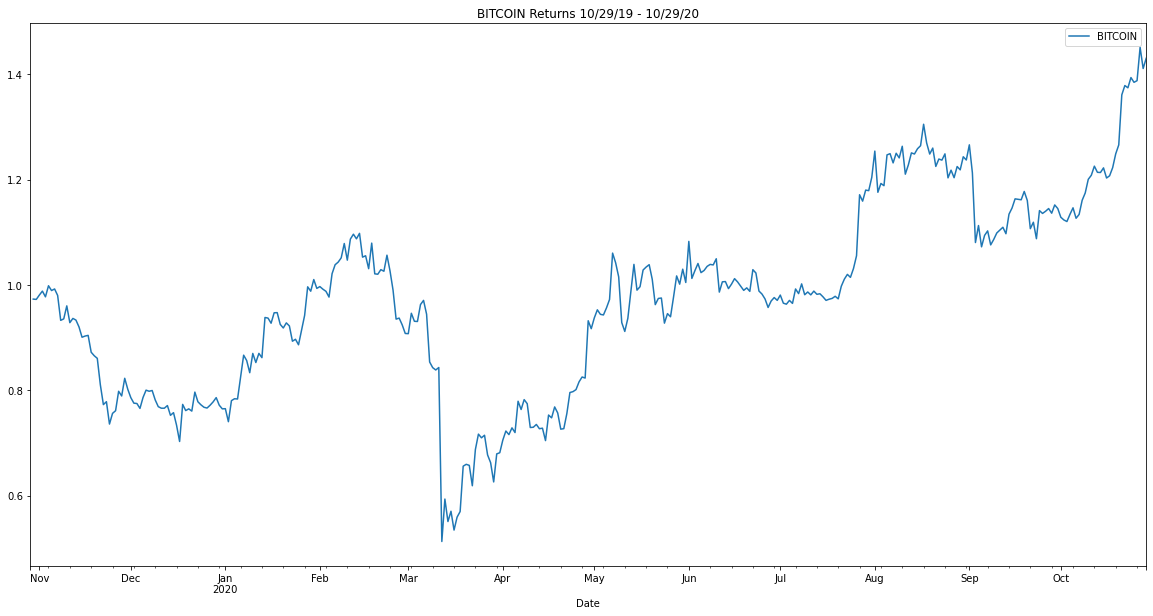

In [178]:
bitcoin_returns = (1 + daily_returns).cumprod()
bitcoin_returns.plot(figsize = (20,10), title="BITCOIN Returns 10/29/19 - 10/29/20")